<div style="text-align: center;">
  <h1><strong>Netflix Recommendation Systems</strong></h1>
</div>

<div style="text-align: center;">
  <img src="https://images.ctfassets.net/y2ske730sjqp/1aONibCke6niZhgPxuiilC/2c401b05a07288746ddf3bd3943fbc76/BrandAssets_Logos_01-Wordmark.jpg?w=940" alt="My centered image" width="700" height="400"/>
</div>

### **Context**

With the advent of technology, societies have become more efficient with their lives. But at the same time, individual human lives have become much more fast-paced and distracted by leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has made it easier for humans with a shortage of time to find and consume good content. Therefore, one of the key challenges for the companies is to be able to figure out what kind of content their customers are most likely to consume. Almost every internet-based company's revenue relies on the time consumers spend on their platforms. These companies need to be able to figure out what kind of content is needed to increase the time spent by customers on their platform and make their experience better.
Netflix is one such streaming service provider that has got a huge market base across the world. It has grown significantly because of its ability to recommend the ‘best’ next movie to every customer based on the huge preference database they have gathered over time, like millions of customers and thousands of movies. This is done by using smart recommendation systems that can recommend movies based on the users’ ratings.

### **Objective**

As a Data Scientist, our objective is to recommend movies by building a recommendation system to propose the top 10 movies for a user based on the likelihood of watching and liking those movies.

### **Data Dictionary**

**movies.csv**
- MovieId - A unique id given to the movies
- ReleaseYear - Year the movie was released
- MovieTitle - Name of the movie

**Netflix_User_Ratings.csv**
- CustId - A unique ID given to the users
- Rating - Rating for each movie expressed on a five-star (integral) scale from 1-5
- Date - Date the rating was made has the format YYYY-MM-DD.
- MovieId - A unique ID given to the movies

## **Importing Libraries and Reading Dataset**

In [1]:
# Importing necessary libraries for project - all libraries below are for numeric computations, dataframes, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Importing library to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Netflix datasets for movies and user ratings on movies
movies_ = pd.read_csv(r'C:\Users\Luis Alfredo\Documents\Data Science - Python\Datasets\movies.csv')
ratings = pd.read_csv(r'C:\Users\Luis Alfredo\Documents\Data Science - Python\Datasets\Netflix_User_Ratings.csv')

In [3]:
# Viewing the dimensions of the datasets
print('Movies Shape: {}'.format(movies_.shape))
print('User Ratings Shape: {}'.format(ratings.shape))

Movies Shape: (17770, 3)
User Ratings Shape: (100480507, 4)


These are very large datasets that requires significant compututational power, therefore we will strategically reduce the size of the dataset for us to be able to process on a local computer. 

In [4]:
# Viewing the movies dataframe imported
movies_.head()

,MovieId,ReleaseYear,MovieTitle
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [5]:
# Viewing the user ratings dataframe imported
ratings.head()

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1
1,822109,5,2005-05-13,1
2,885013,4,2005-10-19,1
3,30878,4,2005-12-26,1
4,823519,3,2004-05-03,1


In [6]:
# Checking data types and null values within the  movie dataset
pd.options.display.max_info_rows = 150000000
pd.options.display.max_info_columns = 150000000

movies_.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MovieId      17770 non-null  int64  
 1   ReleaseYear  17763 non-null  float64
 2   MovieTitle   17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


There are 7 nulls under ReleaseYear. The release year isn't important, but since we are looking for ways to strategically reduce the size of the data, we will remove these movies from the dataset. 

In [7]:
# Checking data types and null values within the user rating dataset
ratings.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column   Non-Null Count      Dtype 
---  ------   --------------      ----- 
 0   CustId   100480507 non-null  int64 
 1   Rating   100480507 non-null  int64 
 2   Date     100480507 non-null  object
 3   MovieId  100480507 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


We will look to see if there are duplicate user ratings for the same movie and will keep the most recent rating.

In [8]:
# Removing any movies with no release year listed
movies_ = movies_[~movies_['ReleaseYear'].isnull()]

movies_.shape

(17763, 3)

In [9]:
# Changing the date data type from string to datetime for the dataframe to be sorted 
ratings['Date'] = pd.to_datetime(ratings['Date'], format='%Y-%m-%d')

# Removing duplicates and keeping the most recent movie review
ratings = ratings.sort_values(by = ['CustId', 'MovieId', 'Date'], ascending = False).drop_duplicates(subset = ['CustId', 'MovieId'], keep = 'first')

ratings.shape

(100480507, 4)

We can see no duplicates were removed from the user ratings datasets, but movies were removed from the movies dataset. 

In [10]:
# Merging the movies dataset to user ratings dataset

data = pd.merge(ratings, movies_, on = 'MovieId', how = 'left')
data

,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle
0,2649429,2,2002-12-07,17692,2002.0,Scooby-Doo
1,2649429,3,2003-07-21,17627,2001.0,Harry Potter and the Sorcerer's Stone
2,2649429,4,2003-02-28,17622,2001.0,Vanilla Sky
3,2649429,4,2004-11-28,17580,2004.0,The Whole Ten Yards
4,2649429,5,2002-05-16,17560,1984.0,Ghostbusters
...,...,...,...,...,...,...
100480502,6,2,2004-11-24,191,2003.0,X2: X-Men United
100480503,6,5,2004-10-10,175,1992.0,Reservoir Dogs
100480504,6,4,2004-09-15,173,1968.0,The Devil's Brigade
100480505,6,3,2004-09-15,157,2004.0,Laird: White Knuckle Extreme


To continue to reduce the size of the dataset, we will only use movies with release year from 2000 and on.

In [11]:
# Removing movies with release year before 2000
data = data[data['ReleaseYear'] > 1999]
data.shape

(44499220, 6)

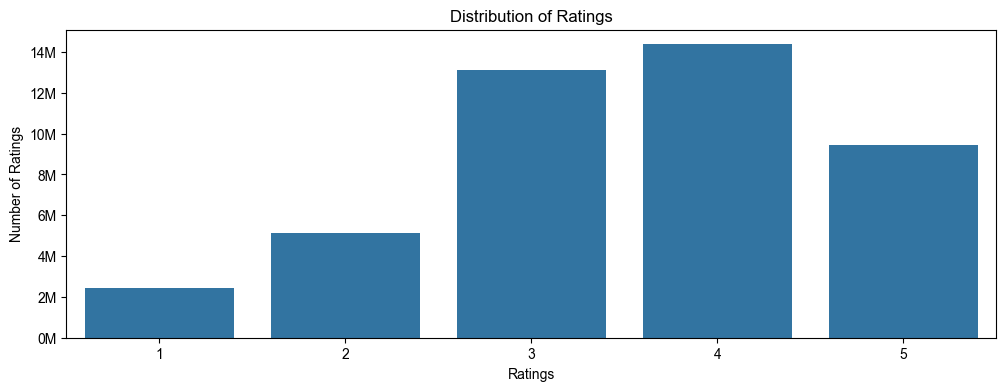

In [12]:
# Creating the layout of the figure for us to add a graph to
fig, ax = plt.subplots(1, 1, figsize = (12,4))

# Creating bar plot as our graph to visualize the distribution of user ratings
sns.countplot(data = data, x = 'Rating')

# Function to format numeric values into millions
def format_ticks(x, pos):
    return f'{int(x / 1000000)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.title('Distribution of Ratings')
plt.xlabel('Ratings', fontsize = 10)
plt.ylabel('Number of Ratings', fontsize = 10)
sns.set_style('darkgrid')
plt.show()

Looking at the distribution of ratings, we can see that most movies are rated 3 stars and more. This is a good sign for Netflix that they are streaming liked movies. 

In [13]:
# Checking unique number of users and movies
data.nunique()

CustId         478880
Rating              5
Date             2090
MovieId          6947
ReleaseYear         6
MovieTitle       6926
dtype: int64

Important to note here that there are 478,880 unique users and 6,947 unique movies. 

In [14]:
# Quick look at number of ratings each movie got, seeing top movies
data['MovieId'].value_counts()

MovieId
5317     232944
14313    200832
15205    196397
1905     193941
15582    176539
          ...  
16875        23
12418        22
4711         22
11344        10
13755         3
Name: count, Length: 6947, dtype: int64

Top movie is 5317 with 232,944 ratings.

In [15]:
# Pulling top movie information
movies_[movies_['MovieId'] == 5317]

,MovieId,ReleaseYear,MovieTitle
5316,5317,2000.0,Miss Congeniality


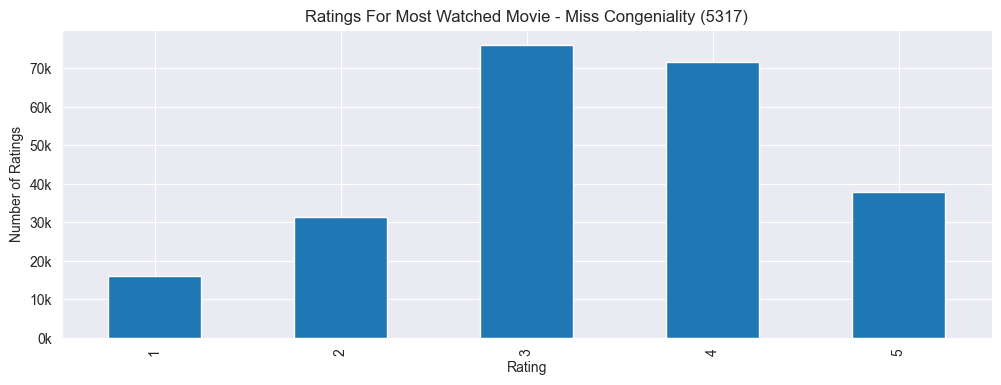

In [16]:
# Creating the layout of the figure for us to add a graph to
fig, ax = plt.subplots(1, 1, figsize = (12,4))

# Creating bar plot as our graph to visualize the ratings of the most watched MovieId 5317 - Miss Congeniality
data[data['MovieId'] == 5317]['Rating'].value_counts().sort_index().plot(kind = 'bar')
sns.set_style('darkgrid')

# Function to format numeric values into thousands
def format_ticks(x, pos):
    return f'{int(x / 1000)}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Ratings For Most Watched Movie - Miss Congeniality (5317)')
plt.show()

We can see that most ratings for Miss Congeniality were 3 stars and meaning most people enjoyed it to some level. Distribution is very similar to that of the distirbution of total ratings. I would personally say good movie. 

## **Data Preparation**

As mentioned before, this dataset is still quite large and has 44,499,220 observations. This is not computationally efficient to build a model using this. Moreover, many users have only rated a few movies and many movies have only a small number of ratings. Hence, we can reduce the dataset by considering certain Logical assumptions here.

We will begin reducing the dataset by randomly choosing 23,000 users for the dataset. After, we will be taking users who have given at least 100 ratings and movies with at least 500 ratings, as we prefer to have some number of ratings for a movie. 

In [17]:
# Choosing 23,000 random integers from 0 to 478,880 
random_ints = list(np.random.choice(np.arange(0,478880), size = 23000, replace = False))

# Using the random 23,000 integers to pick users from a list using the integers as indices
random_users = data['CustId'].unique()[[random_ints]]

# Using the random users list to select the users within the dataframe
data = data[(data.CustId.isin(random_users))]

In [18]:
# Viewing how much the dataset has been reduced
data.shape

(2137791, 6)

In [19]:
# Putting the 23,000 random users into a list 
users = data.CustId

# Creating a dictionary for users and counting the number of ratings made by each user 
rating_counts = dict()

# If user has been accounted for then we add 1 to the rating count, otherwise we start the user rating count at 1, CustId is the dictionary key 
for user in users:
    if user in rating_counts:
        rating_counts[user] += 1

    else:
        rating_counts[user] = 1

In [20]:
# Number of ratings made by a user has a cutoff of 100
ratings_cutoff = 100

# Creating list of users to be removed
remove_users = []

# If user does not have at least 100 rating counts, it will be added to list of users to be removed
for user, num_ratings in rating_counts.items():
    if num_ratings < ratings_cutoff:
        remove_users.append(user)

# Removing users from list that do not have at least 100 ratings count
data = data.loc[~data.CustId.isin(remove_users)]

In [21]:
# Viewing how much the dataset has been reduced
data.shape

(1574729, 6)

In [22]:
# Putting the movies into a list 
movies = data.MovieId

# Creating a dictionary for movies and counting the number of ratings made for each movie
ratings_count = dict()

# If movie has been accounted for then we add 1 to the rating count, otherwise we start the movie rating count at 1, MovieId is the dictionary key 
for movie in movies:
    if movie in ratings_count:
        ratings_count[movie] += 1

    else:
        ratings_count[movie] = 1

In [23]:
# Number of ratings a movie has a cutoff of 500
rating_cutoff = 500

# Creating list of movies to be removed
remove_movies = []

# If movie does not have at least 500 rating counts, it will be added to list of movies to be removed
for movie, num_ratings in ratings_count.items():
    if num_ratings < rating_cutoff:
        remove_movies.append(movie)

# Removing movies from list that do not have at least 500 ratings count
data = data.loc[~data.MovieId.isin(remove_movies)]

In [24]:
# Viewing how much the dataset has been reduced
data.shape

(1280361, 6)

In [25]:
# Checking unique number of users and movies after the dataset has been reduced
data.nunique()

CustId         7316
Rating            5
Date           1963
MovieId         703
ReleaseYear       6
MovieTitle      703
dtype: int64

After reducing the dataset to 1,280,361 observations, we can see that we have 7,316 unique users and 703 unique movies. 

In [26]:
# Copying dataframe
df = data.copy()

In [27]:
# Importing encoder to ease the processing of the dataset
from sklearn.preprocessing import LabelEncoder

# Encoding columns CustId and MovieId
le = LabelEncoder()

df['CustId'] = le.fit_transform(df['CustId'])
df['MovieId'] = le.fit_transform(df['MovieId'])

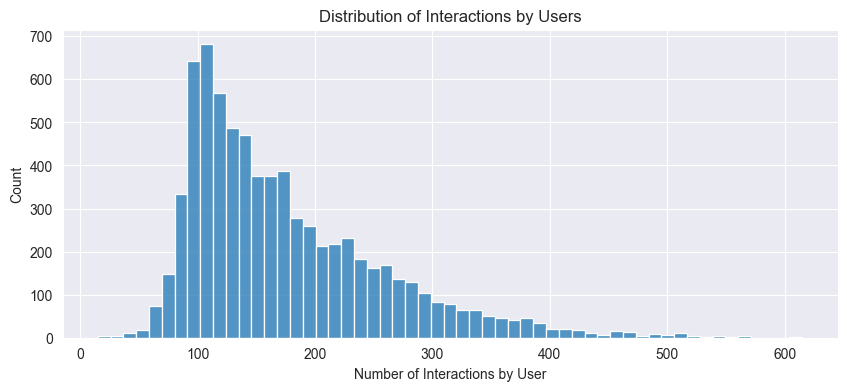

In [28]:
# Creating the layout of the figure for us to add a graph to
fig, ax = plt.subplots(1, 1, figsize = (10,4))

# Creating dataframe for the distribution of interactions to graph
interactions = df.groupby('CustId').count()['MovieId']

# Creating histogram as our graph to visualize the distribution
sns.histplot(interactions)

plt.xlabel('Number of Interactions by User')
plt.title('Distribution of Interactions by Users')
plt.show()

From our bar graph, we see the distribution of interactions is skewed right, meaning that most users in the set have interacted, or rated, 200 movies or less.

Now we will look to pull a random user that has seen Bad Boys II and not Rush Hour 2, as I would say they are similar movies and I enjoyed both. We will use this user and these movie IDs as a guidance for the model's predictions in the upcoming next steps.

In [29]:
# Pulling MovieId for "Bad Boys II" and "Rush Hour 2"
bad_boys_II = df[df['MovieTitle'] == 'Bad Boys II']['MovieId'].iloc[0]
rush_hour = df[df['MovieTitle'] == 'Rush Hour 2']['MovieId'].iloc[0]

# Looking for the first user that has seen Bad Boys II and not Rush Hour 2 and printing out the IDs of both movies, the user ID, and the rating the user gave to Bad Boys II
for user in df['CustId'].unique():
    movie_list = list(df[df['CustId'] == user]['MovieId'])

    if bad_boys_II in movie_list and rush_hour not in movie_list:
        print(df[(df['CustId'] == user)&(df['MovieId'] == bad_boys_II)])
        print(rush_hour)
        break

       CustId  Rating       Date  MovieId  ReleaseYear   MovieTitle
17347    7314       4 2004-06-08      137       2003.0  Bad Boys II
27


## **Recommendation Systems**

## Model 1: Create Rank-Based Recommendation System

Rank-based recommendation systems provide recommendations based on the most popular movies. This kind of recommendation system is useful when we have a **cold start** problem. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend movies to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use a rank-based recommendation system to recommend movies to the new user. We will do this by getting the averages of all ratings for each movie and then ranking them based on their average rating. 

In [30]:
# Calculating averages for each movie
average_rating = df.groupby('MovieId')['Rating'].mean()

# Counting number of ratings made for each movie
count_rating = df.groupby('MovieId')['Rating'].count()

# Creating dataframe with number of ratings and averages
rank_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

In [31]:
rank_rating.head()

,avg_rating,rating_count
MovieId,,
0,3.812076,1623
1,3.714148,4142
2,3.156368,793
3,3.084732,1192
4,3.286432,995


In [32]:
# Creating function to find top n movies based on average movie rating with at least 300 ratings given 
def top_n_movies(data, n, min_interactions = 300):
    data = data[data['rating_count'] >= 300]
    data = data.sort_values(by = 'avg_rating', ascending = False)

    return data.index[:n]

In [33]:
#Using function above to get top 5 rank based movies 
top_5_movies = list(top_n_movies(rank_rating, 5))
top_5_movies

[573, 290, 294, 543, 450]

In [34]:
# Pulling names of the top 5 movies chosen above
top_movies = df[['MovieId', 'ReleaseYear', 'MovieTitle']].drop_duplicates()
top_movies = top_movies[top_movies.MovieId.isin(top_5_movies)]
top_movies

,MovieId,ReleaseYear,MovieTitle
9855,573,2003.0,Lord of the Rings: The Return of the King: Ext...
10189,294,2001.0,The Lord of the Rings: The Fellowship of the R...
48129,543,2003.0,Lord of the Rings: The Return of the King
50018,290,2002.0,Lord of the Rings: The Two Towers: Extended Ed...
565471,450,2004.0,The Sopranos: Season 5


Top rated movies seem to be Lord of the Rings, which seems accurate as it is one of the best trilogies of all time.

# Model 2: User Based Collaborative Filtering Recommendation System

In this type of recommendation system, we do not need any information about the users or movies. We only need user item interaction data to build a collaborative recommendation system. Below we are building a user similarity-based recommendation system using cosine similarity and using KNN to find similar users through nearest neighbors to the given user.  

#### Before building the recommendation systems, let's define the terminologies we will use:

**Relevant movie** - A movie that is rated higher than the threshold rating (3) is relevant, if the actual rating is below the threshold then it is a non-relevant movie.  

**Recommended movie** - A movie that's predicted rating is higher than the threshold rating (3) is a recommended item, if the predicted _rating is below the threshold, then that movie will not be recommended to the user.  

**False Negative (FN)** - It is the frequency of relevant movies that are not recommended to the user. If the relevant movies are not recommended to the user, then the user might not watch the movie. This would result in the loss of opportunity for Netflix, which they would like to minimize.

**False Positive (FP)** - It is the frequency of recommended movies that are not relevant. In this case, the recommendation system is not doing a good job of finding and recommending the relevant movies to the user. This would result in loss of resources for Netflix, which they would also like to minimize.

**Recall** - It is the fraction of actually relevant movies that are recommended to the user, i.e. if out of 10 relevant movies, 6 are recommended to the user then recall is 0.60. The higher the value of recall, the better the model is.

**Precision** - It is the fraction of recommended movies that are relevant, i.e. if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision, the better the model is. 

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are the two most used performance metrics used in the assessment of recommendation systems.**

**Precision** - It is the fraction of recommended movies that are relevant in top k predictions. Value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

**Recall** - It is the fraction of relevant movies that are recommended to the user in top k predictions.

**F1-Score** - It is the mean of Precision@k and Recall@k. When precision@k and recall@k both seem to be important, then it is useful to use this metric because it is representative of both of them.

In [35]:
# Importing dictionary subclass to avoid raising errors for nonexistent keys
from collections import defaultdict

# Importing to load datasets, parse file containing ratings, and calculate the accuracy of models
from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset

# Importing KNN for similarity based recommendations, GridSearchCV for tuning model hyperparameters, train_test_split to split dataset into training and testing sets, and SVD for matrix factorization
from surprise.model_selection import GridSearchCV, train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

In [36]:
# Creating function to calculate precision and recall at top k predictions and minimum rating of 2 for a given model
def precision_recall_at_k(model, k = 10, threshold = 3):
    # Mapping predictions to users
    user_est_true = defaultdict(list)

    # Making predictions on test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    # Calculating precision and recall
    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended movies in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined so we set Precision to 0 when n_rec_k is 0
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0 

        # Recall: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined so we set Recall to 0 when n_rel is 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Calculate mean of all predicted precisions
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Calculate mean of all predicted recalls
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    # Calculate and show accuracy of model
    accuracy.rmse(predictions)

    # Print overall precision, recall, and F-1 score
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F_1 Score: ', round((2 * precision * recall) / (precision + recall), 3))

In [37]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (1, 5))

# Loading dataset
_data = Dataset.load_from_df(df[['CustId', 'MovieId', 'Rating']], reader)

# Splitting data into training and testing sets
trainset, testset = train_test_split(_data, test_size = 0.4, random_state = 42)

Now we will build our similarity based recommendation system, but as we do, we will keep in mind that we would like to optimize both precision and recall as Netflix would like to recommend relevant movies and have relevant movies be recommended. 

In [38]:
# Setting basic model parameters for KNN 
sim_options = {'name': 'cosine', 'user_based': True}

# Applying parameters above to KNN for user similarity based recommendations   
algo_knn_user = KNNBasic(sim_options = sim_options, verbose = False)

# Training algorithm to fit the training set
algo_knn_user.fit(trainset)

# Calculating presicion, recall, and F-1 score from function built at k = 15
precision_recall_at_k(algo_knn_user)

RMSE: 0.9883
Precision:  0.983
Recall:  0.181
F_1 Score:  0.306


- We have calculated RMSE to check how far the overall predicted ratings are from the actual ratings. Our RMSE is 0.99, which means our model is at a standard RMSE and acceptable. 
- Intuition of Recall - We are getting a recall of almost 0.18, which means out of all the relevant movies, 18% are recommended.
- Intuition of Precision - We are getting a precision of almost 0.98, which means out of all the recommended movies, 98% are relevant.
- Here the F_1 score of the baseline model is almost 0.306. It indicates mostly that not all recommended movies were relevant and not all relevant movies were recommended.

We will try to improve precision, recall, and F_1 score by using GridSearchCV and tuning the hyperparameters of this algorithm.

In [39]:
# Predicting rating for CustId = 7314 and MovieId = 137 (user has already rated the movie "Bad Boys II" 4 stars)  
algo_knn_user.predict(7314, 137, r_ui = 4, verbose = True)

user: 7314       item: 137        r_ui = 4.00   est = 3.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=7314, iid=137, r_ui=4, est=3.7998032247645255, details={'actual_k': 40, 'was_impossible': False})

We observe that the actual rating for this user and movie is 4 and the predicted rating is 3.80 by the model which is a good rating as it is quite close to the actual rating. 

In [40]:
# Predicting rating for CustId = 7314 and MovieId = 27 (Rush Hour 2 is a similar movie to 137 and user has not rated it yet) 
algo_knn_user.predict(7314, 27, verbose = True)

user: 7314       item: 27         r_ui = None   est = 3.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=7314, iid=27, r_ui=None, est=3.5491519785408805, details={'actual_k': 40, 'was_impossible': False})

We predict the rating for the same user, but a movie that they haven't seen and is similar (subjectively), we see that model predicts 3.55 rating which seems to be good if the movies were to be similar.

# Improving Model With HyperParameter Tuning

We will perform hyperparameter tuning for the baseline user based collaborative filtering recommendation system and find the RMSE for tuned user based collaborative filtering recommendation system

In [41]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30], 'min_k': [3, 6], 'sim_options': {'name': ['msd', 'cosine'], 'user_based': [True]}}

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(_data)

# Printing best RMSE score and best combination of parameters leading to best RSME score 
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9026119671870619
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'msd', 'user_based': True}}


RMSE significantly improves and we use the best hyperparameters to tune our model.

In [42]:
# Implementing best similarity measure from best parameters suggested above
sim_options = {'name':  'msd', 'user_based': True}

# Optimizing KNNBasic instance with optimal hyperparameter values 
algo_optimized_user = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, verbose = True)

# Training algorithm with training set
algo_optimized_user.fit(trainset)

# Calculating presicion, recall, and F-1 score from function built at k = 25 and optimized algorithm
precision_recall_at_k(algo_optimized_user)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9095
Precision:  0.983
Recall:  0.181
F_1 Score:  0.306


- After tuning hyperparameters, RMSE for the test set has reduced from .99 to .91, which means the model is better fitted.
- We can observe that after tuning the hyperparameters, the tuned model's F-1 score did not change from the baseline model. We can't say that the model's performance has improved significantly after hyperparameter tuning, however, more tuning can be done with more computational power. 

In [43]:
# Predicting rating for CustId = 7314 and MovieId = 137 using optimized algorithm (user has already rated the movie "Bad Boys II" 4 stars)
algo_optimized_user.predict(7314, 137, r_ui = 4, verbose = True)

user: 7314       item: 137        r_ui = 4.00   est = 3.71   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=7314, iid=137, r_ui=4, est=3.7143604769587424, details={'actual_k': 30, 'was_impossible': False})

With the optimized model, we observe that the actual rating for this user and movie is 4 and the predicted rating is 3.71 by the model, which means it has decreased from the previous model. This is an acceptable rating, but brings concern to the model as the predicted rating is less than that of the previous model and further from the actual rating. 

In [44]:
# Predicting rating for CustId = 7314 and MovieId = 27 using optimized algorithm (Rush Hour 2 is a similar movie to 137 and user has not rated it yet) 
algo_optimized_user.predict(7314, 27, verbose = True)

user: 7314       item: 27         r_ui = None   est = 3.25   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=7314, iid=27, r_ui=None, est=3.2474694654760885, details={'actual_k': 30, 'was_impossible': False})

With the optimized model, we predict the rating for the same user and the same movie they haven't seen, and we see that the model predicts 3.25 rating, which is also less than the predicted rating of the previous model. 

Important to note these differences in the prediction as there is a possibility for data bias or underfitting and therefore would require further tuning of the model. However, due to the limited computational power, further tuning cannot be done here, but can be suggested to Netflix to improve the model. 

In [45]:
# Computing similar users when given a user using its 5 nearest neighbors
k_neighbors = algo_optimized_user.get_neighbors(7314, 5)
k_neighbors

[2, 48, 50, 61, 86]

In [46]:
# Creating a function to implement user to user recommendation algorithm from above using optimized KNNBasic model (algo) for a specific dataset (data), user (user_id), and number of recommended movies asked for (top_n)     
def get_recommendations(data, user_id, top_n, algo):
    #List for recommendations
    recommendations = []

    # Creating user interaction matrix
    user_item_interactions_matrix = data.pivot(index = 'CustId', columns = 'MovieId', values = 'Rating')

    # Extracting movies user has not seen
    non_interacted_movies = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Predicting the rating for every movie the user has not seen and adding it to the recommendations list
    for movie_id in non_interacted_movies:

        est = algo.predict(user_id, movie_id).est

        recommendations.append((movie_id, est))

    # Sorting the recommendations list
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returning the top_n number of movies to recommend
    return recommendations[:top_n]

In [47]:
# Creating new dataframe with less columns for easier processing
dataframe = df[['CustId', 'MovieId', 'Rating']]

In [48]:
# Using recommendations function above to get top 10 recommendations for user 6528
recommendations  = get_recommendations(dataframe, 7314, 20, algo_optimized_user)

# Creating dataframe for recommendations above
pd.DataFrame(recommendations, columns = ['MovieId', 'predicted_ratings']).merge(df.drop(['CustId', 'Rating'], axis = 1).drop_duplicates(['MovieId']), on = 'MovieId', how = 'left')

,MovieId,predicted_ratings,Date,ReleaseYear,MovieTitle
0,290,4.903964,2005-09-28,2002.0,Lord of the Rings: The Two Towers: Extended Ed...
1,497,4.864042,2005-01-20,2001.0,Family Guy: Vol. 2: Season 3
2,294,4.709103,2005-09-26,2001.0,The Lord of the Rings: The Fellowship of the R...
3,341,4.671132,2005-08-08,2001.0,24: Season 1
4,573,4.614242,2005-09-26,2003.0,Lord of the Rings: The Return of the King: Ext...
5,587,4.602559,2005-12-27,2001.0,Band of Brothers
6,226,4.600351,2005-09-04,2001.0,The Sopranos: Season 3
7,609,4.600036,2005-08-11,2001.0,CSI: Season 2
8,68,4.535098,2005-10-11,2003.0,Pirates of the Caribbean: The Curse of the Bla...
9,603,4.526037,2005-06-27,2001.0,Friends: Season 8


### Correcting the ratings for recommended movies

When comparing ratings of two movies, ratings are not the only measurement used to describe the likelihood of the user to that movie. The number of ratings a movie has is also important to consider. Therefore, we will subtract the inverse square root of the number of ratings a movie has to adjust the ratings and account for the number of ratings the movie has alongside its ratings. 

In [49]:
# Creating function to correct the ratings for recommended movies where we use the recommendation list (recs) and rank_rating data set that has number of ratings and averages
def ranking_movies(recs, rank_rating):
    # Selecting recommended movies in rank_rating dataset and sorting them by number of ratings movie has
    ranked_movies = rank_rating.loc[[items[0] for items in recs]].sort_values('rating_count', ascending = False)[['rating_count']].reset_index()

    # Merging recommended movies to dataset above to get predicted ratings
    ranked_movies = ranked_movies.merge(pd.DataFrame(recs, columns = ['MovieId', 'predicted_ratings']), on = 'MovieId', how = 'inner')

    # Correcting ratings by subtracting the inverse square root of the number of ratings a movie has
    ranked_movies['corrected_ratings'] = ranked_movies['predicted_ratings'] - 1 / np.sqrt(ranked_movies['rating_count'])

    # Resorting the movies based on new ratings
    ranked_movies = ranked_movies.sort_values('corrected_ratings', ascending = False)

    return ranked_movies

In [50]:
# Applying function above to get new list of recommended movies and merging original data frame to see full view of movies listed
ranking_movies(recommendations, rank_rating).merge(df.drop(['CustId', 'Rating'], axis = 1).drop_duplicates(['MovieId']), on = 'MovieId', how = 'left')

,MovieId,rating_count,predicted_ratings,corrected_ratings,Date,ReleaseYear,MovieTitle
0,290,2786,4.903964,4.885019,2005-09-28,2002.0,Lord of the Rings: The Two Towers: Extended Ed...
1,497,799,4.864042,4.828664,2005-01-20,2001.0,Family Guy: Vol. 2: Season 3
2,294,2783,4.709103,4.690147,2005-09-26,2001.0,The Lord of the Rings: The Fellowship of the R...
3,341,1049,4.671132,4.640257,2005-08-08,2001.0,24: Season 1
4,573,2777,4.614242,4.595266,2005-09-26,2003.0,Lord of the Rings: The Return of the King: Ext...
5,587,1341,4.602559,4.575252,2005-12-27,2001.0,Band of Brothers
6,226,1320,4.600351,4.572827,2005-09-04,2001.0,The Sopranos: Season 3
7,609,555,4.600036,4.557589,2005-08-11,2001.0,CSI: Season 2
8,68,5899,4.535098,4.522078,2005-10-11,2003.0,Pirates of the Caribbean: The Curse of the Bla...
9,646,1145,4.517461,4.487908,2004-05-24,2003.0,Sex and the City: Season 6: Part 1


We can see that after the correction, the order of the movies slightly changed.

# Model 3: Item Based Collaborative Filtering Recommendation System

Above we have seen user based collaborative filtering where similarity is seen between users. Now let us look into item based collaborative filtering where similarity is seen between movies.

In [51]:
# Setting basic model parameters for KNN 
sim_options = {'name': 'cosine', 'user_based': False}

# Applying parameters above to KNN for user similarity based recommendations
algo_knn_item = KNNBasic(sim_options = sim_options, verbose = False)

# Training algorithm to fit the training set
algo_knn_item.fit(trainset)

# Calculating presicion, recall, and F-1 score from function built at k = 15
precision_recall_at_k(algo_knn_item)

RMSE: 0.9677
Precision:  0.982
Recall:  0.181
F_1 Score:  0.306


- Our RMSE is higher than our user-based recommendation system at 0.97, and we can say our model is at a standard RMSE and acceptable. 
- Here our F_1 score of the baseline model is 0.306, which is the same as the user-based recommendation system. It indicates mostly that not all recommended movies were relevant and not all relevant movies were recommended.

We will try to improve our F_1 score by using GridSearchCV and tuning the hyperparameters of this algorithm.

In [52]:
# Predicting rating for CustId = 7314 and MovieId = 137 (user has already rated the movie "Bad Boys II" 4 stars) 
algo_knn_item.predict(7314, 137, r_ui = 4, verbose = True)

user: 7314       item: 137        r_ui = 4.00   est = 3.53   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=7314, iid=137, r_ui=4, est=3.525332612381202, details={'actual_k': 40, 'was_impossible': False})

In [53]:
# Predicting rating for CustId = 7314 and MovieId = 27 (Rush Hour 2 is a similar movie to 137 and user has not rated it yet)
algo_knn_item.predict(7314, 27, verbose = True)

user: 7314       item: 27         r_ui = None   est = 3.45   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=7314, iid=27, r_ui=None, est=3.450109894106149, details={'actual_k': 40, 'was_impossible': False})

We observe that the model predicts movie 137 and 27 for user 7314 is an even lower rating than the user based recommendation system. 

In [54]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30], 'min_k': [3, 6], 'sim_options': {'name': ['msd', 'cosine'], 'user_based': [False]}}

# Performing 3-fold cross validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3)

# Fitting the data
grid_obj.fit(_data)

# Printing best RMSE score and best combination of parameters leading to best RSME score
print(grid_obj.best_score['rmse'])
print(grid_obj.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

RMSE significantly improves and we use the best hyperparameters to tune our model.

In [55]:
# Implementing best similarity measure from best parameters suggested above
sim_options = {'name': 'msd', 'user_based': False}

# Optimizing KNNBasic instance with optimal hyperparameter values
algo_optimized_item = KNNBasic(sim_options = sim_options, k = 20, min_k = 3, verbose = False)

# Training algorithm with training set
algo_optimized_item.fit(trainset)

# Calculating presicion, recall, and F-1 score from function built at k = 30 and optimized algorithm
precision_recall_at_k(algo_optimized_item)

RMSE: 0.8858
Precision:  0.987
Recall:  0.182
F_1 Score:  0.307


We see here that RMSE significantly improves and F_1 score also improves. The item based recommendation sytem is performing better than the user based recommendation system in terms of these metrics. 

In [56]:
# Predicting rating for CustId = 7314 and MovieId = 137 using optimized algorithm (user has already rated the movie "Bad Boys II" 4 stars)
algo_optimized_item.predict(7314, 137, r_ui = 4, verbose = True)

user: 7314       item: 137        r_ui = 4.00   est = 3.48   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=7314, iid=137, r_ui=4, est=3.480175088170105, details={'actual_k': 20, 'was_impossible': False})

In [57]:
# Predicting rating for CustId = 7314 and MovieId = 27 using optimized algorithm (Rush Hour 2 is a similar movie to 137 and user has not rated it yet) 
algo_optimized_item.predict(7314, 27, verbose = True)

user: 7314       item: 27         r_ui = None   est = 3.35   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=7314, iid=27, r_ui=None, est=3.3484350876724553, details={'actual_k': 20, 'was_impossible': False})

However, even though the model was improved, we observe that the model predicts movies 137 and 27 for user 7314 is an even lower rating than the previous predictions. Raising the concern of  underfitting once again. Further tuning must be performed with more computational power as mentioned before. 

In [59]:
# Computing similar users when given a user using its nearest neighbors
algo_optimized_item.get_neighbors(137, 25)

[265,
 184,
 102,
 523,
 481,
 576,
 378,
 337,
 611,
 258,
 419,
 411,
 458,
 570,
 339,
 63,
 549,
 176,
 377,
 217,
 299,
 574,
 143,
 366,
 132]

In [61]:
# Using recommendations function to get top 10 recommendations for user 6528
recommendations = get_recommendations(dataframe, 7314, 20, algo_optimized_item)

# Creating dataframe for recommendations above
pd.DataFrame(recommendations, columns = ['MovieId', 'predicted_ratings']).merge(df.drop(['CustId', 'Rating'], axis = 1).drop_duplicates(['MovieId']), on = 'MovieId', how = 'left')

,MovieId,predicted_ratings,Date,ReleaseYear,MovieTitle
0,499,4.107019,2005-01-13,2003.0,24: Season 3
1,46,4.102420,2005-10-19,2001.0,A Beautiful Mind
2,445,4.102376,2005-08-14,2002.0,Harry Potter and the Chamber of Secrets
3,196,4.099457,2004-07-13,2003.0,Seabiscuit
4,573,4.070008,2005-09-26,2003.0,Lord of the Rings: The Return of the King: Ext...
5,681,4.065383,2005-09-26,2002.0,E.T. the Extra-Terrestrial: The 20th Anniversa...
6,87,4.062188,2005-01-09,2001.0,Lord of the Rings: The Fellowship of the Ring
7,294,4.061111,2005-09-26,2001.0,The Lord of the Rings: The Fellowship of the R...
8,153,4.060180,2005-09-26,2003.0,Finding Nemo (Widescreen)
9,561,4.059469,2005-01-09,2001.0,Shrek (Full-screen)


In [62]:
# Applying corrected ranking function to get new list of recommended movies and merging original data frame to see full view of movies listed
ranking_movies(recommendations, rank_rating).merge(df.drop(['CustId', 'Rating'], axis = 1).drop_duplicates(['MovieId']), on = 'MovieId', how = 'left')

,MovieId,rating_count,predicted_ratings,corrected_ratings,Date,ReleaseYear,MovieTitle
0,46,3924,4.102420,4.086456,2005-10-19,2001.0,A Beautiful Mind
1,445,3865,4.102376,4.086291,2005-08-14,2002.0,Harry Potter and the Chamber of Secrets
2,196,3882,4.099457,4.083407,2004-07-13,2003.0,Seabiscuit
3,499,630,4.107019,4.067178,2005-01-13,2003.0,24: Season 3
4,573,2777,4.070008,4.051032,2005-09-26,2003.0,Lord of the Rings: The Return of the King: Ext...
5,87,5069,4.062188,4.048143,2005-01-09,2001.0,Lord of the Rings: The Fellowship of the Ring
6,153,4665,4.060180,4.045539,2005-09-26,2003.0,Finding Nemo (Widescreen)
7,561,4281,4.059469,4.044185,2005-01-09,2001.0,Shrek (Full-screen)
8,681,2093,4.065383,4.043524,2005-09-26,2002.0,E.T. the Extra-Terrestrial: The 20th Anniversa...
9,446,5028,4.057522,4.043419,2005-01-09,2002.0,Lord of the Rings: The Two Towers


We can see that after the correction, the order of the movies slightly changed.

# Model 4: Matrix Factorization

Model-based Collaborative Filtering is a personalized recommendation system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use latent features to find recommendations for each user. We will use SVD, where it is used to compute the latent features from the user-movie matrix, and keeping in mind that SVD does not work when we miss values in the user-item matrix.

In [63]:
# Setting up matrix factorization via SVD 
svd = SVD(random_state = 1)

# Training SVD with training set
svd.fit(trainset)

# Calculating presicion, recall, and F-1 score from function built at k = 15
precision_recall_at_k(svd)

RMSE: 0.8679
Precision:  0.988
Recall:  0.183
F_1 Score:  0.309


We observe that the baseline RMSE and F_1 score for the matrix factorization model is higher in comparison to the F_1 score for the user-user similarity-based recommendation system and lower in comparison to the optimized user-user similarity-based recommendation system. The SVD RMSE and F_1 score are also better than both baseline and optimized item-item similarity-based recommendation systems.

In [64]:
# Predicting rating for CustId = 7314 and MovieId = 137 (user has already rated the movie "Bad Boys II" 4 stars) 
svd.predict(7314, 137, r_ui = 4, verbose = True)

user: 7314       item: 137        r_ui = 4.00   est = 3.53   {'was_impossible': False}


Prediction(uid=7314, iid=137, r_ui=4, est=3.533955040114533, details={'was_impossible': False})

In [65]:
# Predicting rating for CustId = 7314 and MovieId = 27 (Rush Hour 2 is a similar movie to 137 and user has not rated it yet)
svd.predict(7314, 27, verbose = True)

user: 7314       item: 27         r_ui = None   est = 3.15   {'was_impossible': False}


Prediction(uid=7314, iid=27, r_ui=None, est=3.1471595291165766, details={'was_impossible': False})

We observe that the model's rating predictions for movie 137 and 27 for user 7314 is similar to the rating predictions of item based recommendation system. 

In [66]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'n_epochs': [10, 15, 20], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold cross validation to tune the hyperparameters
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs_.fit(_data)

# Printing best RMSE score and best combination of parameters leading to best RMSE score
print(gs_.best_score['rmse'])
print(gs_.best_params['rmse'])

0.9060439962833716
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


RMSE declines which can be due to not enough tuning because of low computational power. However, we will use these intermediate hyperparameters to tune our model.

In [67]:
# Implementing optimal hyperparameters for optimized SVD
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Fitting the data
svd_optimized = svd_optimized.fit(trainset)

# Calculating presicion, recall, and F-1 score from function built at k = 30 and optimized algorithm
precision_recall_at_k(svd_optimized)

RMSE: 0.9061
Precision:  0.983
Recall:  0.182
F_1 Score:  0.307


As mentioned before, the model's performance has declined due to poor tuning from low computational power. We observe that RMSE and F_1 score both decline for the model.

In [68]:
# Predicting rating for CustId = 7314 and MovieId = 137 using optimized SVD (user has already rated the movie "Bad Boys II" 4 stars)
svd_optimized.predict(7314, 137, r_ui = 4, verbose = True)

user: 7314       item: 137        r_ui = 4.00   est = 3.34   {'was_impossible': False}


Prediction(uid=7314, iid=137, r_ui=4, est=3.3444270045008277, details={'was_impossible': False})

In [69]:
# Predicting rating for CustId = 7314 and MovieId = 27 using optimized SVD (Rush Hour 2 is a similar movie to 137 and user has not rated it yet) 
svd_optimized.predict(7314, 27, verbose = True)

user: 7314       item: 27         r_ui = None   est = 3.32   {'was_impossible': False}


Prediction(uid=7314, iid=27, r_ui=None, est=3.320525724168555, details={'was_impossible': False})

We observe that the model predicts movie 137 and 27 for user 7314 is an even lower rating than the baseline SVD model. 

In [70]:
# Using recommendations function to get top 20 recommendations for user 7314
svd_recommendations = get_recommendations(dataframe, 7314, 20, svd_optimized)

# Creating dataframe for recommendations above
pd.DataFrame(svd_recommendations, columns = ['MovieId', 'predicted_ratings']).merge(df.drop(['CustId', 'Rating'], axis = 1).drop_duplicates(['MovieId']), on = 'MovieId', how = 'left')

,MovieId,predicted_ratings,Date,ReleaseYear,MovieTitle
0,290,4.573611,2005-09-28,2002.0,Lord of the Rings: The Two Towers: Extended Ed...
1,573,4.555752,2005-09-26,2003.0,Lord of the Rings: The Return of the King: Ext...
2,294,4.507427,2005-09-26,2001.0,The Lord of the Rings: The Fellowship of the R...
3,543,4.395319,2005-02-15,2003.0,Lord of the Rings: The Return of the King
4,587,4.388709,2005-12-27,2001.0,Band of Brothers
5,226,4.377251,2005-09-04,2001.0,The Sopranos: Season 3
6,450,4.377166,2005-12-08,2004.0,The Sopranos: Season 5
7,327,4.341475,2004-05-10,2002.0,The Sopranos: Season 4
8,87,4.332862,2005-01-09,2001.0,Lord of the Rings: The Fellowship of the Ring
9,341,4.323529,2005-08-08,2001.0,24: Season 1


In [71]:
# Applying corrected ranking function to get new list of recommended movies and merging original data frame to see full view of movies listed
ranking_movies(svd_recommendations, rank_rating).merge(df.drop(['CustId', 'Rating'], axis = 1).drop_duplicates(['MovieId']), on = 'MovieId', how = 'left')

,MovieId,rating_count,predicted_ratings,corrected_ratings,Date,ReleaseYear,MovieTitle
0,290,2786,4.573611,4.554665,2005-09-28,2002.0,Lord of the Rings: The Two Towers: Extended Ed...
1,573,2777,4.555752,4.536776,2005-09-26,2003.0,Lord of the Rings: The Return of the King: Ext...
2,294,2783,4.507427,4.488471,2005-09-26,2001.0,The Lord of the Rings: The Fellowship of the R...
3,543,4620,4.395319,4.380606,2005-02-15,2003.0,Lord of the Rings: The Return of the King
4,587,1341,4.388709,4.361401,2005-12-27,2001.0,Band of Brothers
5,226,1320,4.377251,4.349727,2005-09-04,2001.0,The Sopranos: Season 3
6,450,726,4.377166,4.340053,2005-12-08,2004.0,The Sopranos: Season 5
7,87,5069,4.332862,4.318816,2005-01-09,2001.0,Lord of the Rings: The Fellowship of the Ring
8,327,1196,4.341475,4.312559,2004-05-10,2002.0,The Sopranos: Season 4
9,341,1049,4.323529,4.292653,2005-08-08,2001.0,24: Season 1


We can see that after the correction, the order of the movies slightly changed.

## **Conclusion**:

In this case study, we developed and evaluated recommendation systems using four different algorithms. They are as follows:
  - Rank-based using averages
  - User-user similarity-based collaborative filtering
  - Item-item similarity-based collaborative filtering
  - Model-based (matrix factorization) collaborative filtering

Each algorithm is tailored to address specific challenges or optimize certain aspects of a recommendation system. Overall, we found that matrix factorization achieved the best performance in terms of F1 score (.309). However, the user-user similarity-based recommendation system yielded predictions closest to actual ratings, which may have been coincidental and can be investigated with further testing. It is important to note that collaborative filtering identifies nearest neighbors based on similarities in user preferences or movie attributes while matrix factorization reduces the dimensionality of both user and movie data, leveraging latent factors to capture hidden patterns and improve recommendations.

When developing these algorithms, computational power emerged as the primary challenge. Limited computational resources prevented us from significantly increasing the dimensionality of model tuning, which likely contributed to the observed underfitting across all models. Tuning the models more extensively could have led to better performance. Additionally, the dataset used in our study was initially quite large, and we had to reduce its size, which might have introduced data bias and affected the accuracy of our models. Despite these challenges, we were able to build and implement initial recommendation systems that provide a solid foundation for further improvements.

In conclusion, we recommend that Netflix implement the rank-based recommendation system for new users, as it provides immediate, relevant suggestions based on average ratings. Additionally, we suggest combining the different recommendation techniques explored in this case study to create a more complex hybrid model that leverages the strengths of each approach. To further enhance the performance of these models, we advise rigorous tuning and the use of stronger computational resources. Finally, we recommend developing separate recommendation systems for TV shows and movies, in addition to the hybrid model, to optimize the accuracy and relevance of recommendations across these distinct categories.